# Libraries

In [1]:
import numpy              as np
import matplotlib.pyplot  as plt
import matplotlib         as mt
import seaborn            as sns
from matplotlib.gridspec  import GridSpec
from __future__           import unicode_literals
from astropy.cosmology    import FlatLambdaCDM

In [2]:
# %matplotlib notebook

# Loading Dataset

In [3]:
my_data = np.loadtxt('../../Catalogue/Match07_smalldoubleclean_emlines.csv', delimiter=',', dtype=str)

In [4]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [5]:
redshift     = my_dictionary['Z'].astype(float)
cataid       = my_dictionary['CATAID'].astype(str)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
mag_abs_nuv  = my_dictionary['MAG_ABSOLUTE_NUV'].astype(float)
mag_abs_fuv  = my_dictionary['MAG_ABSOLUTE_FUV'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)
dn4000       = my_dictionary['D4000N'].astype(float)
h_alpha_flux = my_dictionary['HA_FLUX_COMP'].astype(float) # taken from the COMPLEX table
survey       = my_dictionary['SURVEY'].astype(str)
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)
bpt_class    = my_dictionary['BPT_CLASS'].astype(str)
whan_class   = my_dictionary['WHAN_CLASS'].astype(str)

In [6]:
idx_uvup = np.where(uv_class=='UV_UPTURN')

In [7]:
print uv_class[idx_uvup]

['UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN'
 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'UV_UPTURN' 'U

### But let's separate the UV upturn objects

In [8]:
idx_sf_up = np.where(whan_class[idx_uvup]=='SF')
idx_rp_up = np.where(whan_class[idx_uvup]=='Retired/Passive')
idx_wa_up = np.where(whan_class[idx_uvup]=='wAGN')
idx_sa_up = np.where(whan_class[idx_uvup]=='sAGN')
idx_na_up = np.where(whan_class[idx_uvup]=='NA')

In [9]:
uv_color       = (fuv_band-nuv_band)[idx_uvup]
uv_color_sf_up = uv_color[idx_sf_up]
uv_color_rp_up = uv_color[idx_rp_up]
uv_color_wa_up = uv_color[idx_wa_up]
uv_color_sa_up = uv_color[idx_sa_up]
uv_color_na_up = uv_color[idx_na_up]

In [10]:
print uv_color.size

210


In [11]:
mag_abs_nuv_up = mag_abs_nuv[idx_uvup]

In [12]:
mag_abs_nuv_sf_up = mag_abs_nuv_up[idx_sf_up]
mag_abs_nuv_rp_up = mag_abs_nuv_up[idx_rp_up]
mag_abs_nuv_wa_up = mag_abs_nuv_up[idx_wa_up]
mag_abs_nuv_sa_up = mag_abs_nuv_up[idx_sa_up]
mag_abs_nuv_na_up = mag_abs_nuv_up[idx_na_up]

In [13]:
z_uvup  = redshift[idx_uvup]
z_sf_up = z_uvup[idx_sf_up]
z_rp_up = z_uvup[idx_rp_up]
z_wa_up = z_uvup[idx_wa_up]
z_sa_up = z_uvup[idx_sa_up]
z_na_up = z_uvup[idx_na_up]

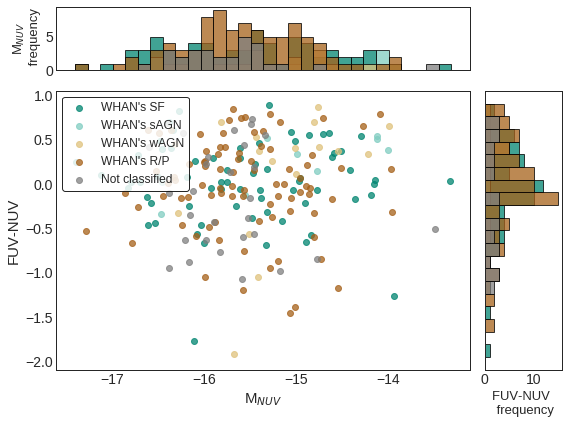

In [14]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.
      
    fig = plt.figure(figsize=(8,6))
    gs  = GridSpec(4,4, height_ratios=[2.,1.5,3.,3.], width_ratios=[3.,1.5,3.,1.5])

    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])
    
    # Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------
    ax_joint.scatter(mag_abs_nuv_sf_up, uv_color_sf_up, c='#018571', alpha=0.75, label='WHAN\'s SF')
    ax_joint.scatter(mag_abs_nuv_sa_up, uv_color_sa_up, c='#80cdc1', alpha=0.75, label='WHAN\'s sAGN')
    ax_joint.scatter(mag_abs_nuv_wa_up, uv_color_wa_up, c='#dfc27d', alpha=0.75, label='WHAN\'s wAGN')
    ax_joint.scatter(mag_abs_nuv_rp_up, uv_color_rp_up, c='#a6611a', alpha=0.75, label='WHAN\'s R/P')
    ax_joint.scatter(mag_abs_nuv_na_up, uv_color_na_up, c='gray', alpha=0.75, label='Not classified')
    ax_joint.tick_params('both', labelsize='14')
    l1 = ax_joint.legend(loc='upper left', numpoints=1, fontsize=12, frameon=True, framealpha=0.85)
    l1.get_frame().set_edgecolor('black')
    
    # Mnuv distribution -- on the top ------------------------------------------------------------------------------
    n, bins, patches = ax_marg_x.hist(mag_abs_nuv_sf_up, color='#018571', alpha=0.75, bins=30, edgecolor='black', 
                                      density=False)
    n, bins, patches = ax_marg_x.hist(mag_abs_nuv_sa_up, color='#80cdc1', alpha=0.75, bins=bins, edgecolor='black', 
                                      density=False)
    n, bins, patches = ax_marg_x.hist(mag_abs_nuv_wa_up, color='#dfc27d', alpha=0.75, bins=bins, edgecolor='black', 
                                      density=False)
    n, bins, patches = ax_marg_x.hist(mag_abs_nuv_rp_up, color='#a6611a', alpha=0.75, bins=bins, edgecolor='black', 
                                      density=False)
    n, bins, patches = ax_marg_x.hist(mag_abs_nuv_na_up, color='gray', alpha=0.75, bins=bins, edgecolor='black', 
                                      density=False)
    ax_marg_x.tick_params('both', labelsize='14')  
    
    # FUV-NUV distribution --on the right --------------------------------------------------------------------------
    n, bins, patches = ax_marg_y.hist(uv_color_sf_up, orientation="horizontal", color='#018571', alpha=0.75, 
                                      bins=20, edgecolor='black', density=False)
    n, bins, patches = ax_marg_y.hist(uv_color_sa_up, orientation="horizontal", color='#80cdc1', alpha=0.75, 
                                      bins=bins, edgecolor='black', density=False)
    n, bins, patches = ax_marg_y.hist(uv_color_wa_up, orientation="horizontal", color='#dfc27d', alpha=0.75, 
                                      bins=bins, edgecolor='black', density=False)
    n, bins, patches = ax_marg_y.hist(uv_color_rp_up, orientation="horizontal", color='#a6611a', alpha=0.75, 
                                      bins=bins, edgecolor='black', density=False)
    n, bins, patches = ax_marg_y.hist(uv_color_na_up, orientation="horizontal", color='gray', alpha=0.75, 
                                      bins=bins, edgecolor='black', density=False)    
    ax_marg_y.tick_params(axis='x', labelsize='14')
    
   # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel("M$_{NUV}$", fontsize=15)
    ax_joint.set_ylabel("FUV-NUV", fontsize=15)

    # Set labels on marginals
    ax_marg_y.set_xlabel('FUV-NUV \n frequency', fontsize=13)
    ax_marg_x.set_ylabel('M$_{NUV}$ \n frequency', fontsize=13)
    
    plt.savefig('../../Figs/g2_cmag_uvup_whan.pdf')
    plt.savefig('../../Figs/g2_cmag_uvup_whan.png')
    plt.tight_layout()
    plt.show()

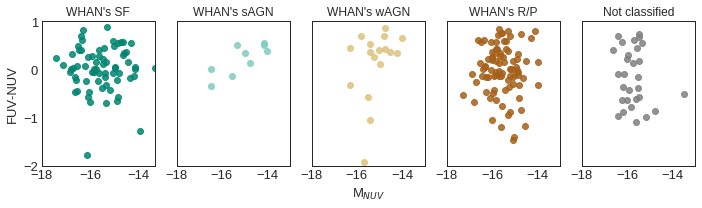

In [15]:
with plt.style.context("seaborn-white"):
    # OVERALL SETTINGS
    plt.subplots(figsize=(10,3))
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.

    # WHAN's SF
    ax1=plt.subplot(1,5,1)
    plot01 = plt.scatter(mag_abs_nuv_sf_up, uv_color_sf_up, c='#018571', alpha=0.85, label='WHAN\'s SF')
    plt.title('WHAN\'s SF')
    plt.ylabel("FUV-NUV", fontsize=13)
    plt.xlim([mag_abs_nuv_up.min(), mag_abs_nuv_up.max()])
    plt.ylim([-2, 1])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's sAGN
    ax2=plt.subplot(1,5,2)
    plot02 = plt.scatter(mag_abs_nuv_sa_up, uv_color_sa_up, c='#80cdc1', alpha=0.85, label='WHAN\'s sAGN')
    plt.title('WHAN\'s sAGN')
    ax2.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's wAGN
    ax3=plt.subplot(1,5,3)
    plot03 = plt.scatter(mag_abs_nuv_wa_up, uv_color_wa_up, c='#dfc27d', alpha=0.85, label='WHAN\'s wAGN')
    plt.title('WHAN\'s wAGN')
    ax3.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1])
    plt.tick_params('both', labelsize='13')
    plt.xlabel("M$_{NUV}$", fontsize=13)
    plt.xticks([-18, -16, -14])

    # WHAN's Retired/Ṕassive
    ax4=plt.subplot(1,5,4)
    plot04 = plt.scatter(mag_abs_nuv_rp_up, uv_color_rp_up, c='#a6611a', alpha=0.85, label='WHAN\'s R/P')
    plt.title('WHAN\'s R/P')
    ax4.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's NA
    ax5=plt.subplot(1,5,5)
    plot05 = plt.scatter(mag_abs_nuv_na_up, uv_color_na_up, c='gray', alpha=0.85, label='Not classified')
    plt.title('Not classified')
    ax5.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    plt.tight_layout()
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split.pdf')
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split.png')
    plt.show()

/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


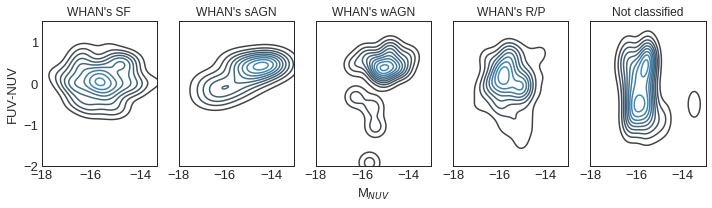

In [16]:
with plt.style.context("seaborn-white"):
    # OVERALL SETTINGS
    plt.subplots(figsize=(10,3))
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.

    # WHAN's SF
    ax1=plt.subplot(1,5,1)
    plot01 = sns.kdeplot(mag_abs_nuv_sf_up, uv_color_sf_up, alpha=0.85, label='WHAN\'s SF')
    plt.title('WHAN\'s SF')
    plt.ylabel("FUV-NUV", fontsize=13)
    plt.xlim([mag_abs_nuv_up.min(), mag_abs_nuv_up.max()])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's sAGN
    ax2=plt.subplot(1,5,2)
    plot02 = sns.kdeplot(mag_abs_nuv_sa_up, uv_color_sa_up, alpha=0.85, label='WHAN\'s sAGN')
    plt.title('WHAN\'s sAGN')
    ax2.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's wAGN
    ax3=plt.subplot(1,5,3)
    plot03 = sns.kdeplot(mag_abs_nuv_wa_up, uv_color_wa_up, alpha=0.85, label='WHAN\'s wAGN')
    plt.title('WHAN\'s wAGN')
    ax3.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xlabel("M$_{NUV}$", fontsize=13)
    plt.xticks([-18, -16, -14])

    # WHAN's Retired/Ṕassive
    ax4=plt.subplot(1,5,4)
    plot04 = sns.kdeplot(mag_abs_nuv_rp_up, uv_color_rp_up, alpha=0.85, label='WHAN\'s R/P')
    plt.title('WHAN\'s R/P')
    ax4.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's NA
    ax5=plt.subplot(1,5,5)
    plot05 = sns.kdeplot(mag_abs_nuv_na_up, uv_color_na_up, alpha=0.85, label='Not classified')
    plt.title('Not classified')
    ax5.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    plt.tight_layout()
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split_kernel.pdf')
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split_kernel.png')
    plt.show()

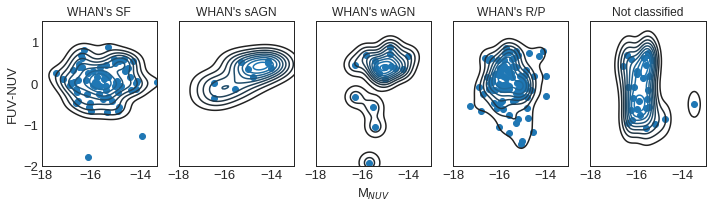

In [17]:
with plt.style.context("seaborn-white"):
    # OVERALL SETTINGS
    plt.subplots(figsize=(10,3))
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.

    # WHAN's SF
    ax1=plt.subplot(1,5,1)
    plot01  = plt.scatter(mag_abs_nuv_sf_up, uv_color_sf_up, alpha=1., label='WHAN\'s SF')
    plot01k = sns.kdeplot(mag_abs_nuv_sf_up, uv_color_sf_up, alpha=1., label='WHAN\'s SF')
    plt.title('WHAN\'s SF')
    plt.ylabel("FUV-NUV", fontsize=13)
    plt.xlim([mag_abs_nuv_up.min(), mag_abs_nuv_up.max()])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's sAGN
    ax2=plt.subplot(1,5,2)
    plot02  = plt.scatter(mag_abs_nuv_sa_up, uv_color_sa_up, alpha=1., label='WHAN\'s sAGN')
    plot02k = sns.kdeplot(mag_abs_nuv_sa_up, uv_color_sa_up, alpha=1., label='WHAN\'s sAGN')
    plt.title('WHAN\'s sAGN')
    ax2.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's wAGN
    ax3=plt.subplot(1,5,3)
    plot03  = plt.scatter(mag_abs_nuv_wa_up, uv_color_wa_up, alpha=1., label='WHAN\'s wAGN')
    plot03k = sns.kdeplot(mag_abs_nuv_wa_up, uv_color_wa_up, alpha=1., label='WHAN\'s wAGN')
    plt.title('WHAN\'s wAGN')
    ax3.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xlabel("M$_{NUV}$", fontsize=13)
    plt.xticks([-18, -16, -14])

    # WHAN's Retired/Ṕassive
    ax4=plt.subplot(1,5,4)
    plot04  = plt.scatter(mag_abs_nuv_rp_up, uv_color_rp_up, alpha=1., label='WHAN\'s R/P')
    plot04k = sns.kdeplot(mag_abs_nuv_rp_up, uv_color_rp_up, alpha=1., label='WHAN\'s R/P')
    plt.title('WHAN\'s R/P')
    ax4.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    # WHAN's NA
    ax5=plt.subplot(1,5,5)
    plot05  = plt.scatter(mag_abs_nuv_na_up, uv_color_na_up, alpha=1., label='Not classified')
    plot05k = sns.kdeplot(mag_abs_nuv_na_up, uv_color_na_up, alpha=1., label='Not classified')
    plt.title('Not classified')
    ax5.yaxis.set_visible(False)
    plt.xlim([-18, -13])
    plt.ylim([-2, 1.5])
    plt.tick_params('both', labelsize='13')
    plt.xticks([-18, -16, -14])

    plt.tight_layout()
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split_both.pdf')
    plt.savefig('../../Figs/g2_cmag_uvup_whan_split_both.png')
    plt.show()